In [2]:
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting
from sklearn.preprocessing import PowerTransformer

In [6]:
# Load the dataset
file_path = "academics.csv"  
data = pd.read_csv(file_path)

In [8]:
data.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40.0,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42.0,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35.0,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50.0,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,NaN,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70.0,80,25,70,Yes,Good,Under-7,M


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    479 non-null    object 
 1   NationalITy               480 non-null    object 
 2   PlaceofBirth              480 non-null    object 
 3   StageID                   480 non-null    object 
 4   GradeID                   480 non-null    object 
 5   SectionID                 480 non-null    object 
 6   Topic                     480 non-null    object 
 7   Semester                  480 non-null    object 
 8   Relation                  480 non-null    object 
 9   raisedhands               478 non-null    float64
 10  VisITedResources          480 non-null    int64  
 11  AnnouncementsView         480 non-null    int64  
 12  Discussion                480 non-null    int64  
 13  ParentAnsweringSurvey     480 non-null    object 
 14  Parentscho

In [12]:
data.isnull().sum()

gender                      1
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 2
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [14]:
# Fill missing values in 'gender' with mode
data['gender'].fillna(data['gender'].mode()[0], inplace=True)

# Fill missing values in 'raisedhands' with mean
data['raisedhands'].fillna(data['raisedhands'].mean(), inplace=True)

C:\Users\bhush\AppData\Local\Temp\ipykernel_22108\645216332.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gender'].fillna(data['gender'].mode()[0], inplace=True)
C:\Users\bhush\AppData\Local\Temp\ipykernel_22108\645216332.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

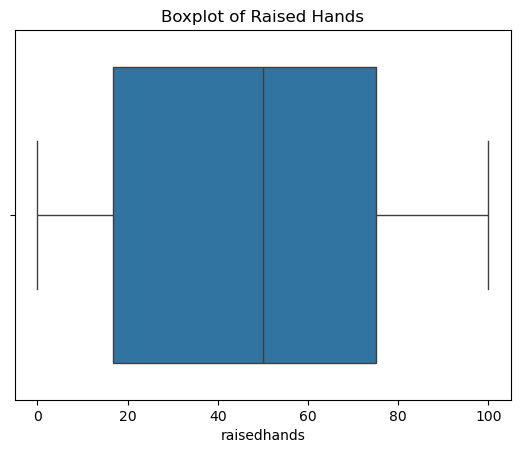

In [16]:
# Boxplot for 'raisedhands'
df=data
sns.boxplot(data=df, x='raisedhands')
plt.title('Boxplot of Raised Hands')
plt.show()

In [18]:
def DetectOutlier(df,var):
    # IQR method is used to deal with outliers
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    high, low = Q3+1.5*IQR, Q1-1.5*IQR
    print("Highest allowed in variable:", var, high)
    print("lowest allowed in variable:", var, low)
    count = df[(df[var] > high) | (df[var] < low)][var].count()
    print('Total outliers in:',var,':',count)
    df1 = df[((df[var] < low) | (df[var] > high))] #these are outliers
    print('Outliers : \n', len(df1))
    print(df1.T)
    df = df[((df[var] >= low) & (df[var] <= high))] #now filter out data which is not outlier
    return(df)

In [20]:
#Display and remove outliers
df = DetectOutlier(df, 'raisedhands')

Highest allowed in variable: raisedhands 162.375
lowest allowed in variable: raisedhands -70.625
Total outliers in: raisedhands : 0
Outliers : 
 0
Empty DataFrame
Columns: []
Index: [gender, NationalITy, PlaceofBirth, StageID, GradeID, SectionID, Topic, Semester, Relation, raisedhands, VisITedResources, AnnouncementsView, Discussion, ParentAnsweringSurvey, ParentschoolSatisfaction, StudentAbsenceDays, Class]


In [22]:
# Apply PowerTransformer to 'raisedhands'
pt = PowerTransformer(method='yeo-johnson')
data['raisedhands'] = pt.fit_transform(data[['raisedhands']])

In [24]:
df['AnnouncementsView'] = pt.fit_transform(df['AnnouncementsView'].values.reshape(-1,1))
df['Discussion'] = pt.fit_transform(df['Discussion'].values.reshape(-1,1))

In [26]:
df['AnnouncementsView'].skew()

-0.1808514358221063

In [28]:
df['Discussion'].skew()

-0.13316737386524535

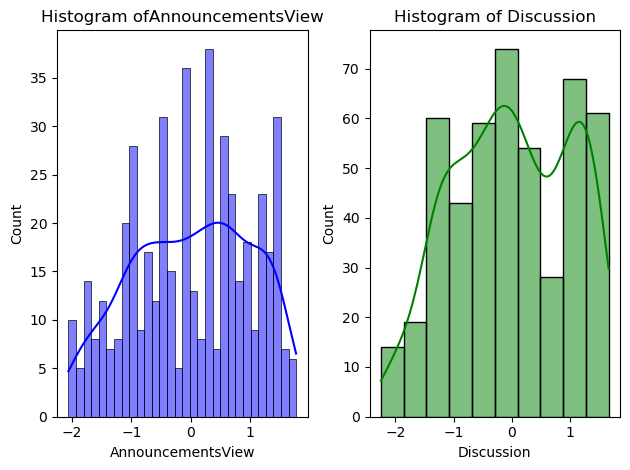

In [30]:
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(df['AnnouncementsView'], bins=30, kde=True, color='blue')
plt.title('Histogram ofAnnouncementsView')
plt.xlabel('AnnouncementsView')
plt.ylabel('Count')

# Second subplot: 
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(df['Discussion'], bins=10, kde=True, color='green')
plt.title('Histogram of Discussion')
plt.xlabel('Discussion')
plt.ylabel('Count')

# Show the plots
plt.tight_layout()  # Adjust spacing between plots
plt.show()